In [131]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Collection

Create a **books_df** dataframe:

In [132]:
PATH = "/book_scraping_and_data_analysis/books/books/spiders/books_data/"

# Use glob to get a list of all .csv files in a `books_data` directory
csv_files = glob.glob(PATH + "*.csv")

# Empty list to store dataframes
dataframes = []

# Loop through the file names and read the .csv files into `dataframes`
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate the dataframes
books_df = pd.concat(dataframes, axis=0)

# Data Cleaning

Change column header from a snake case to a camel case:

In [133]:
books_df.rename(
    columns={
        "title": "Title",
        "authors": "Authors",
        "number_of_pages": "NumberOfPages",
        "publisher": "Publisher",
        "publication_date": "PublicationDate",
        "price_in_euros": "PriceInEuros",
        "discount_in_euros": "DiscountInEuros",
        "rating": "Rating",
        "number_of_votes_goodreads": "NumberOfVotesGoodreads",
        "number_of_votes_one_star": "NumberOfVotesOneStar",
        "number_of_votes_two_stars": "NumberOfVotesTwoStars",
        "number_of_votes_three_stars": "NumberOfVotesThreeStars",
        "number_of_votes_four_stars": "NumberOfVotesFourStars",
        "number_of_votes_five_stars": "NumberOfVotesFiveStars",
        "bestsellers_rank": "BestsellersRank",
        "isbn13": "ISBN13",
        "language": "Language",
        "category": "Category",
    },
    inplace=True,
)

Change the data type of the **PublicationDate** column:

In [134]:
books_df["PublicationDate"] = pd.to_datetime(books_df["PublicationDate"])

Change data types of the **PriceInEuros** and **DiscountInEuros** columns:

In [135]:
books_df["PriceInEuros"] = pd.to_numeric(books_df["PriceInEuros"], errors="coerce")
books_df["DiscountInEuros"] = pd.to_numeric(books_df["DiscountInEuros"], errors="coerce")

Check that all data in dataframe has the correct data type:

In [136]:
books_df.dtypes

Title                              object
Authors                            object
NumberOfPages                       int64
Publisher                          object
PublicationDate            datetime64[ns]
PriceInEuros                      float64
DiscountInEuros                   float64
Rating                            float64
NumberOfVotesGoodreads              int64
NumberOfVotesOneStar                int64
NumberOfVotesTwoStars               int64
NumberOfVotesThreeStars             int64
NumberOfVotesFourStars              int64
NumberOfVotesFiveStars              int64
BestsellersRank                     int64
ISBN13                              int64
Language                           object
Category                           object
dtype: object

Check how many values are null:

In [137]:
books_df.isna().sum()

Title                       0
Authors                    54
NumberOfPages               0
Publisher                   0
PublicationDate             0
PriceInEuros                3
DiscountInEuros             2
Rating                      0
NumberOfVotesGoodreads      0
NumberOfVotesOneStar        0
NumberOfVotesTwoStars       0
NumberOfVotesThreeStars     0
NumberOfVotesFourStars      0
NumberOfVotesFiveStars      0
BestsellersRank             0
ISBN13                      0
Language                   17
Category                    0
dtype: int64

Change all null values:

In [138]:
books_df[["Authors", "PriceInEuros", "DiscountInEuros", "Language"]] = books_df[
    ["Authors", "PriceInEuros", "DiscountInEuros", "Language"]].fillna(
    {
        "Authors": "Undefined",
        "PriceInEuros": 0,
        "DiscountInEuros": 0,
        "Language": "English",
    }
)

books_df.isna().sum()

Title                      0
Authors                    0
NumberOfPages              0
Publisher                  0
PublicationDate            0
PriceInEuros               0
DiscountInEuros            0
Rating                     0
NumberOfVotesGoodreads     0
NumberOfVotesOneStar       0
NumberOfVotesTwoStars      0
NumberOfVotesThreeStars    0
NumberOfVotesFourStars     0
NumberOfVotesFiveStars     0
BestsellersRank            0
ISBN13                     0
Language                   0
Category                   0
dtype: int64

Check if the values in **DiscountInEuros** column exceeds the values in the **PriceInEuros** column:

In [139]:
books_df[books_df["DiscountInEuros"] > books_df["PriceInEuros"]]

,Title,Authors,NumberOfPages,Publisher,PublicationDate,PriceInEuros,DiscountInEuros,Rating,NumberOfVotesGoodreads,NumberOfVotesOneStar,NumberOfVotesTwoStars,NumberOfVotesThreeStars,NumberOfVotesFourStars,NumberOfVotesFiveStars,BestsellersRank,ISBN13,Language,Category
62,Homer Vol. I. Iliad (Books I-XII),"D. B. Monro, T. W. Allen",304,Oxford University Press,1963-03-26,26.38,29.62,4.49,1212,10,19,110,301,772,63631,9780198145288,English,"Art, Photography"
414,Songs of Innocence & Experience; Plus the Marr...,William Blake,122,Aziloth Books,2015-03-31,11.45,16.75,4.39,36,0,1,5,9,21,428673,9781909735781,English,"Art, Photography"
667,Grande Illusions : Books I & II,"Tom Savini, Stephen King, George Romero",286,AuthorMike Ink,2013-10-13,37.18,39.92,4.29,24,0,1,3,8,12,143747,9780988446892,English,"Art, Photography"
715,Homer Vol. II. Iliad (Books XIII-XXIV),"D. B. Monro, T. W. Allen",320,Oxford University Press,1963-03-26,24.91,35.09,4.53,947,6,17,83,203,638,398761,9780198145295,English,"Art, Photography"
801,Homer Vol. IV. Odyssey (Books XIII-XXIV),"D. B. Monro, T. W. Allen",240,Oxford University Press,2010-03-26,24.91,31.09,4.48,568,8,10,58,117,375,404586,9780198145325,English,"Art, Photography"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,A Brief History of Moscovia : And Other Less-k...,John Milton,120,University of South Carolina Press,2009-10-30,8.88,15.12,4.00,2,0,0,0,2,0,3542679,9781570038105,English,"Travel, Holiday, Guides"
663,Pacific Tales,Becke,340,Kegan Paul,1987-06-01,31.31,107.19,3.45,11,1,1,2,6,1,9780710302540,9780710302540,English,"Travel, Holiday, Guides"
674,Pacific Tales,Becke,340,Kegan Paul,1987-06-01,31.31,107.19,3.45,11,1,1,2,6,1,9780710302540,9780710302540,English,"Travel, Holiday, Guides"
681,Pacific Tales,Becke,340,Kegan Paul,1987-06-01,31.31,107.19,3.45,11,1,1,2,6,1,9780710302540,9780710302540,English,"Travel, Holiday, Guides"


Decrement all values in the **DiscountInEuros** column by a factor 10 that are greater than the values in the **PriceInEuros** column:

In [140]:
books_df["DiscountInEuros"].mask(
    books_df["DiscountInEuros"] > books_df["PriceInEuros"], books_df["DiscountInEuros"] / 10, inplace=True
)

Round all floating point values to 2 decimal places:

In [141]:
books_df[["PriceInEuros", "DiscountInEuros", "Rating"]] = books_df[["PriceInEuros", "DiscountInEuros", "Rating"]].round(
    decimals=2
)

Check if the total number of votes from 1 to 5 are equal values in the **NumberOfVotesGoodreads** column:

In [142]:
columns = ["NumberOfVotesOneStar", "NumberOfVotesTwoStars", "NumberOfVotesThreeStars", "NumberOfVotesFourStars",
           "NumberOfVotesFiveStars"]

number_of_votes_stars = books_df[columns].sum(axis=1)

(books_df["NumberOfVotesGoodreads"] == number_of_votes_stars).all()

True

Check that **Rating** does not exceed 5:

In [143]:
(books_df["Rating"] > 5).all()

False

Replace all values with 0 where values in the **BestsellersRank** are equal to values in the **ISBN13** column:

In [144]:
books_df["BestsellersRank"].mask(books_df["BestsellersRank"] == books_df["ISBN13"], 0, inplace=True)

Check the length of the values the **ISBN13** column are equal 13:

In [145]:
(books_df["ISBN13"].astype(str).str.len() == 13).all()

True

Check that integer or float data types are at least 0:

In [146]:
columns = [
    "PriceInEuros",
    "DiscountInEuros",
    "Rating",
    "NumberOfVotesGoodreads",
    "NumberOfVotesOneStar",
    "NumberOfVotesTwoStars",
    "NumberOfVotesThreeStars",
    "NumberOfVotesFourStars",
    "NumberOfVotesFiveStars",
    "BestsellersRank",
]

(books_df[columns] >= 0).all()

PriceInEuros               True
DiscountInEuros            True
Rating                     True
NumberOfVotesGoodreads     True
NumberOfVotesOneStar       True
NumberOfVotesTwoStars      True
NumberOfVotesThreeStars    True
NumberOfVotesFourStars     True
NumberOfVotesFiveStars     True
BestsellersRank            True
dtype: bool

Replace all incorrect authors' full names:

In [147]:
books_df["Authors"].mask(books_df["Authors"] == "Luis Davila, 100 Jesus Books", "Luis Davila", inplace=True)

Check if the dataframe has duplicate or not and drop all duplicates:

In [148]:
books_df.duplicated(subset="Title")
books_df = books_df.drop_duplicates(subset="Title")

# Data Analysis

Number of books in each category:

In [149]:
category_counts = books_df["Category"].value_counts()
category_counts

Art, Photography                     2148
Children, Books                      1737
Fiction                              1512
Religion                             1336
Mind, Body, Spirit                   1034
Romance                               920
History, Archaeology                  851
Dictionaries, Languages               843
Business, Finance, Law                806
Humour                                678
Medical                               642
Science, Fiction, Fantasy, Horror     569
Personal, Development                 524
Computing                             475
Sport                                 436
Biography                             425
Natural, History                      406
Food, Drink                           403
Science, Geography                    388
Poetry, Drama                         371
Technology, Engineering               331
Reference                             283
Crime, Thriller                       254
Travel, Holiday, Guides           

Statistical information about the **NumberOfPages** column:

In [150]:
number_of_pages_mean = books_df["NumberOfPages"].mean()
number_of_pages_median = books_df["NumberOfPages"].median()
number_of_pages_mode = books_df["NumberOfPages"].mode()
number_of_pages_min = books_df["NumberOfPages"].min()
number_of_pages_max = books_df["NumberOfPages"].max()
number_of_pages_std = books_df["NumberOfPages"].std()

stats_number_of_pages = {
    "Mean": number_of_pages_mean,
    "Median": number_of_pages_median,
    "Mode": number_of_pages_mode[0],
    "Min": number_of_pages_min,
    "Max": number_of_pages_max,
    "STD": number_of_pages_std,
}

stats_number_of_pages_df = pd.DataFrame(stats_number_of_pages, index=["NumberOfPages"])
stats_number_of_pages_df

,Mean,Median,Mode,Min,Max,STD
NumberOfPages,240.407067,196.0,192,1,9999,348.761833


Statistical information about the **PriceInEuros** column:

In [151]:
price_in_euros_mean = books_df["PriceInEuros"].mean()
price_in_euros_median = books_df["PriceInEuros"].median()
price_in_euros_mode = books_df["PriceInEuros"].mode()
price_in_euros_min = books_df["PriceInEuros"].min()
price_in_euros_max = books_df["PriceInEuros"].max()
price_in_euros_std = books_df["PriceInEuros"].std()

stats_price_in_euros = {
    "Mean": price_in_euros_mean,
    "Median": price_in_euros_median,
    "Mode": price_in_euros_mode[0],
    "Min": price_in_euros_min,
    "Max": price_in_euros_max,
    "STD": price_in_euros_std,
}

stats_price_in_euros_df = pd.DataFrame(stats_price_in_euros, index=["PriceInEuros"])
stats_price_in_euros_df

,Mean,Median,Mode,Min,Max,STD
PriceInEuros,22.518736,14.66,14.03,0.0,779.39,27.979698


Statistical information about the **DiscountInEuros** column:

In [152]:
discount_in_euros_mean = books_df["DiscountInEuros"].mean()
discount_in_euros_median = books_df["DiscountInEuros"].median()
discount_in_euros_mode = books_df["DiscountInEuros"].mode()
discount_in_euros_min = books_df["DiscountInEuros"].min()
discount_in_euros_max = books_df["DiscountInEuros"].max()
discount_in_euros_std = books_df["DiscountInEuros"].std()

stats_discount_in_euros = {
    "Mean": discount_in_euros_mean,
    "Median": discount_in_euros_median,
    "Mode": discount_in_euros_mode[0],
    "Min": discount_in_euros_min,
    "Max": discount_in_euros_max,
    "STD": discount_in_euros_std,
}

stats_discount_in_euros_df = pd.DataFrame(stats_discount_in_euros, index=["DiscountInEuros"])
stats_discount_in_euros_df

,Mean,Median,Mode,Min,Max,STD
DiscountInEuros,3.824463,1.88,6.17,0.0,155.17,7.230157


Statistical information about the **Rating** column:

In [153]:
rating_mean = books_df["Rating"].mean()
rating_median = books_df["Rating"].median()
rating_mode = books_df["Rating"].mode()
rating_min = books_df["Rating"].min()
rating_max = books_df["Rating"].max()
rating_std = books_df["Rating"].std()

stats_rating = {
    "Mean": rating_mean,
    "Median": rating_median,
    "Mode": rating_mode[0],
    "Min": rating_min,
    "Max": rating_max,
    "STD": rating_std,
}

stats_rating_df = pd.DataFrame(stats_rating, index=["Rating"])
stats_rating_df

,Mean,Median,Mode,Min,Max,STD
Rating,4.064472,4.09,5.0,1.0,5.0,0.572193


Statistical information about the **NumberOfVotesGoodreads** column:

In [154]:
number_of_votes_goodreads_mean = books_df["NumberOfVotesGoodreads"].mean()
number_of_votes_goodreads_median = books_df["NumberOfVotesGoodreads"].median()
number_of_votes_goodreads_mode = books_df["NumberOfVotesGoodreads"].mode()
number_of_votes_goodreads_min = books_df["NumberOfVotesGoodreads"].min()
number_of_votes_goodreads_max = books_df["NumberOfVotesGoodreads"].max()
number_of_votes_goodreads_std = books_df["NumberOfVotesGoodreads"].std()

stats_number_of_votes_goodreads = {
    "Mean": number_of_votes_goodreads_mean,
    "Median": number_of_votes_goodreads_median,
    "Mode": number_of_votes_goodreads_mode[0],
    "Min": number_of_votes_goodreads_min,
    "Max": number_of_votes_goodreads_max,
    "STD": number_of_votes_goodreads_std,
}

stats_number_of_votes_goodreads_df = pd.DataFrame(stats_number_of_votes_goodreads, index=["NumberOfVotesGoodreads"])
stats_number_of_votes_goodreads_df

,Mean,Median,Mode,Min,Max,STD
NumberOfVotesGoodreads,5302.728818,38.0,1,1,3807481,61345.64535


Statistical information about the **BestsellersRank** column:

In [155]:
bestsellers_rank_mean = books_df["BestsellersRank"].mean()
bestsellers_rank_median = books_df["BestsellersRank"].median()
bestsellers_rank_mode = books_df["BestsellersRank"].mode()
bestsellers_rank_min = books_df["BestsellersRank"].min()
bestsellers_rank_max = books_df["BestsellersRank"].max()
bestsellers_rank_std = books_df["BestsellersRank"].std()

stats_bestsellers_rank = {
    "Mean": bestsellers_rank_mean,
    "Median": bestsellers_rank_median,
    "Mode": bestsellers_rank_mode[0],
    "Min": bestsellers_rank_min,
    "Max": bestsellers_rank_max,
    "STD": bestsellers_rank_std,
}

stats_bestsellers_rank_df = pd.DataFrame(stats_bestsellers_rank, index=["BestsellersRank"])
stats_bestsellers_rank_df

,Mean,Median,Mode,Min,Max,STD
BestsellersRank,597795.64099,251722.0,0,0,4165915,787742.334495


# Data Visualization

The percentage of all categories in the dataframe:

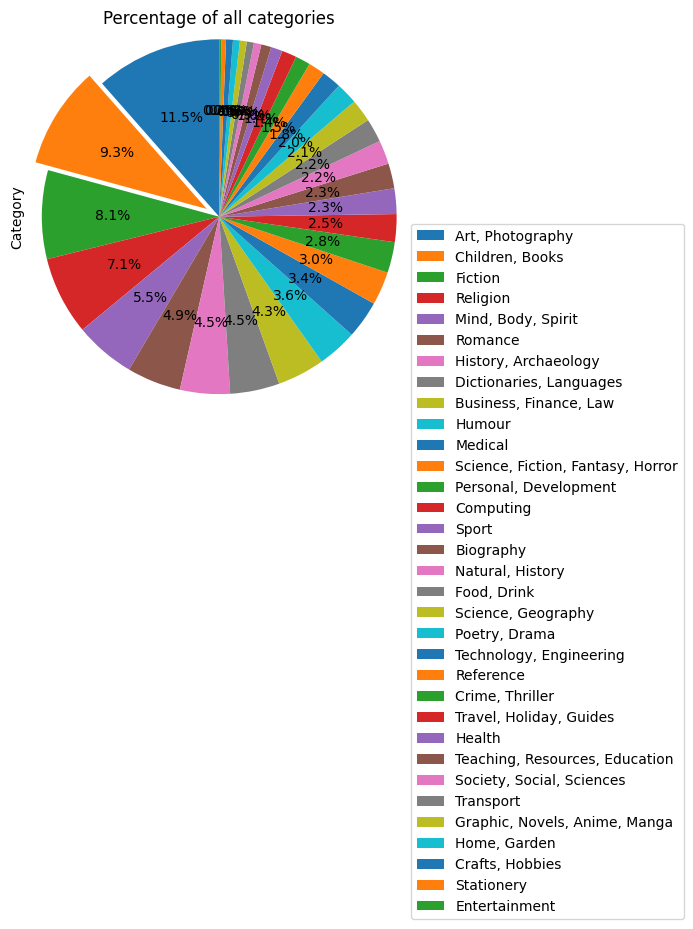

In [156]:
category_counts = books_df["Category"].value_counts()

category_counts.plot.pie(
    autopct="%.1f%%",
    startangle=90,
    explode=[0, 0.1] + [0 for _ in range(len(category_counts) - 2)],
    labels=None,
    textprops={"fontsize": 10},
    radius=1.2,
)

plt.legend(category_counts.index, bbox_to_anchor=(1, 0.5))
plt.title("Percentage of all categories")
plt.show()

Top 10 authors who wrote the most books:

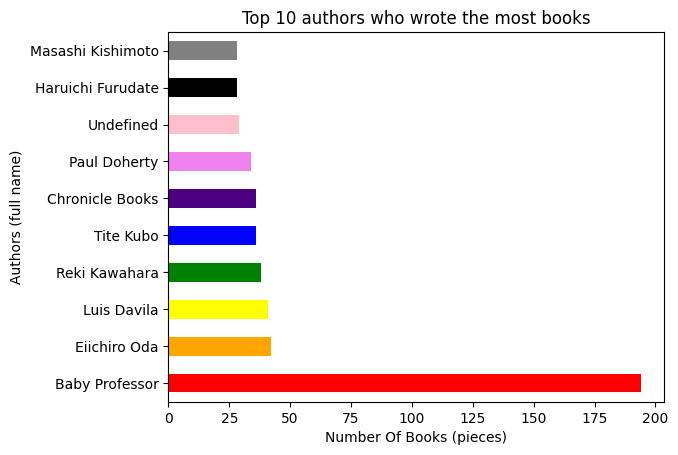

In [157]:
author_count = books_df["Authors"].value_counts()
top_10_authors = author_count.head(10)

top_10_authors.plot(
    kind="barh",
    xlabel="Number Of Books (pieces)",
    ylabel="Authors (full name)",
    title="Top 10 authors who wrote the most books",
    color=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "black", "gray"],
)

plt.show()

Top 10 publishers who published the most books:

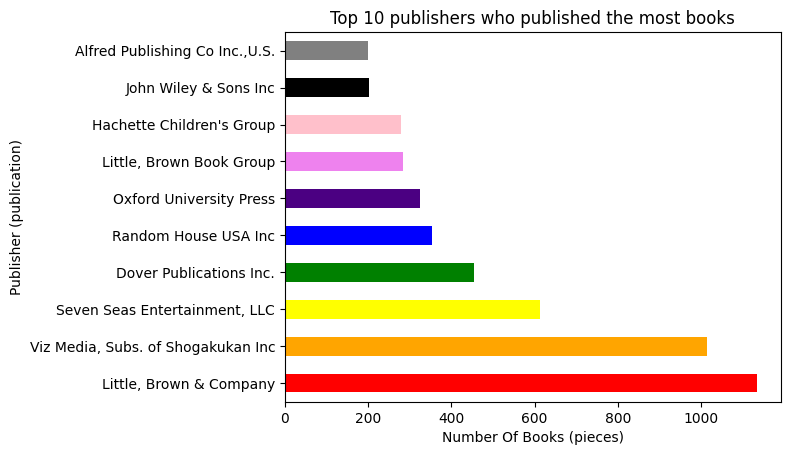

In [158]:
publisher_count = books_df["Publisher"].value_counts()
top_10_publishers = publisher_count.head(10)

top_10_publishers.plot(
    kind="barh",
    xlabel="Number Of Books (pieces)",
    ylabel="Publisher (publication)",
    title="Top 10 publishers who published the most books",
    color=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "black", "gray"],
)

plt.show()

Top 10 most expensive books:

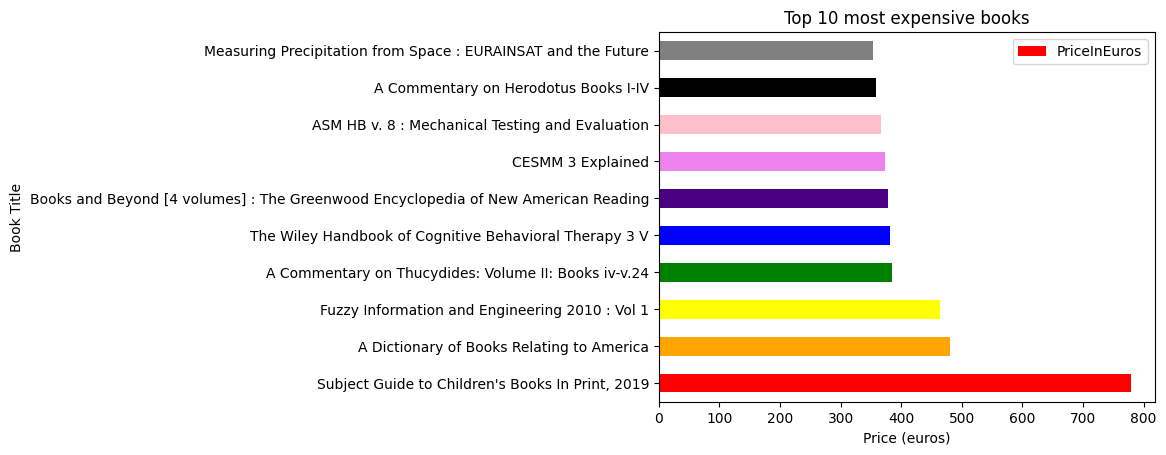

In [159]:
expensive_books_df = books_df.sort_values(by="PriceInEuros", ascending=False)
top_10_expensive_books = expensive_books_df.head(10)

top_10_expensive_books.plot(
    x="Title",
    y="PriceInEuros",
    kind="barh",
    xlabel="Price (euros)",
    ylabel="Book Title",
    title="Top 10 most expensive books",
    color=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "black", "gray"],
)

plt.show()

Top 10 books with the biggest discount:

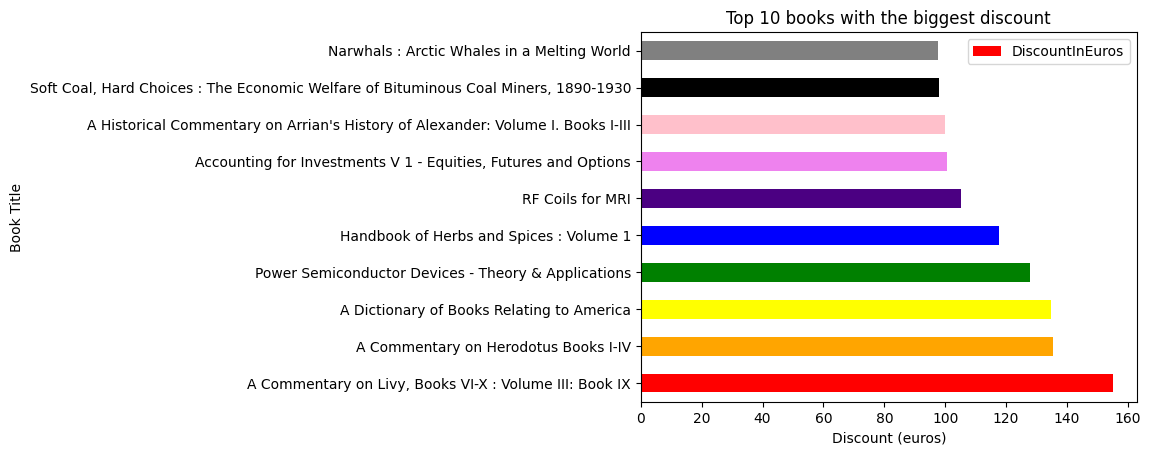

In [160]:
discount_books_df = books_df.sort_values(by="DiscountInEuros", ascending=False)
top_10_discount_books = discount_books_df.head(10)

top_10_discount_books.plot(
    x="Title",
    y="DiscountInEuros",
    kind="barh",
    xlabel="Discount (euros)",
    ylabel="Book Title",
    title="Top 10 books with the biggest discount",
    color=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "black", "gray"],
)

plt.show()

Top 10 books by rating from 1 to 5 stars:

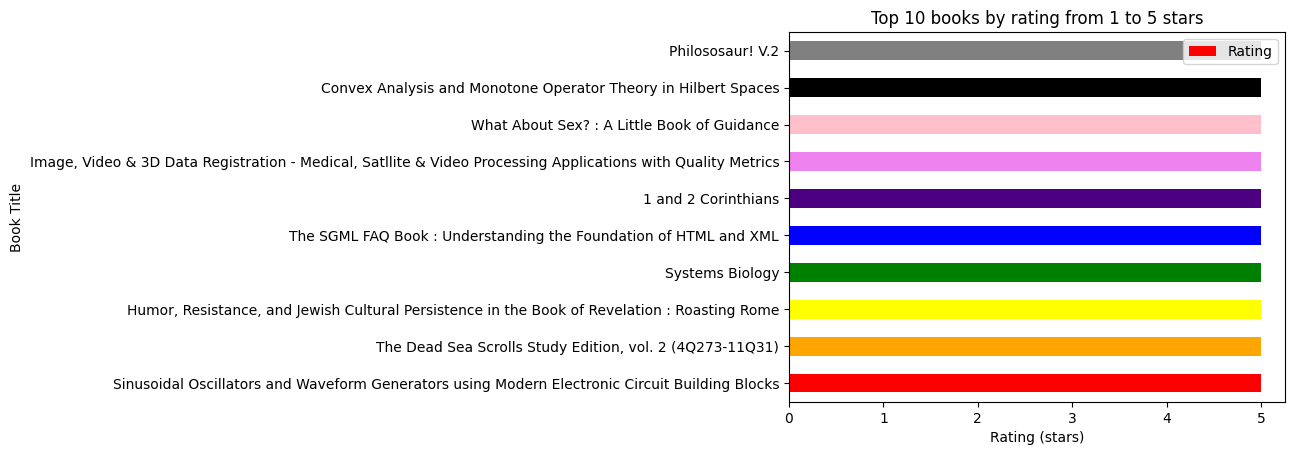

In [161]:
rating_stars_books_df = books_df.sort_values(by="Rating", ascending=False)
top_10_rating_stars_books = rating_stars_books_df.head(10)

top_10_rating_stars_books.plot(
    x="Title",
    y="Rating",
    kind="barh",
    xlabel="Rating (stars)",
    ylabel="Book Title",
    title="Top 10 books by rating from 1 to 5 stars",
    color=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "black", "gray"],
)

plt.show()

Top 10 books that received the most votes from goodreads:

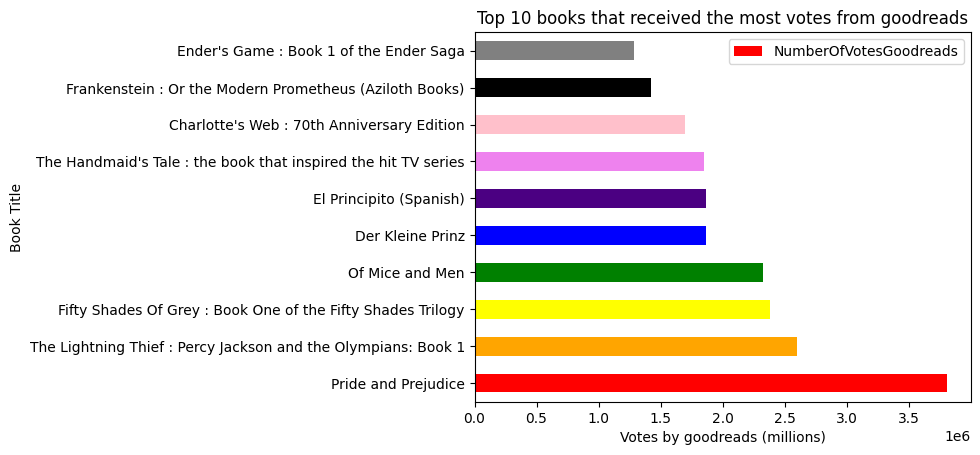

In [162]:
votes_goodreads_books_df = books_df.sort_values(by="NumberOfVotesGoodreads", ascending=False)
top_10_votes_goodreads_books = votes_goodreads_books_df.head(10)

top_10_votes_goodreads_books.plot(
    x="Title",
    y="NumberOfVotesGoodreads",
    kind="barh",
    xlabel="Votes by goodreads (millions)",
    ylabel="Book Title",
    title="Top 10 books that received the most votes from goodreads",
    color=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "black", "gray"],
)

plt.show()

Top 10 books by bestsellers rank:

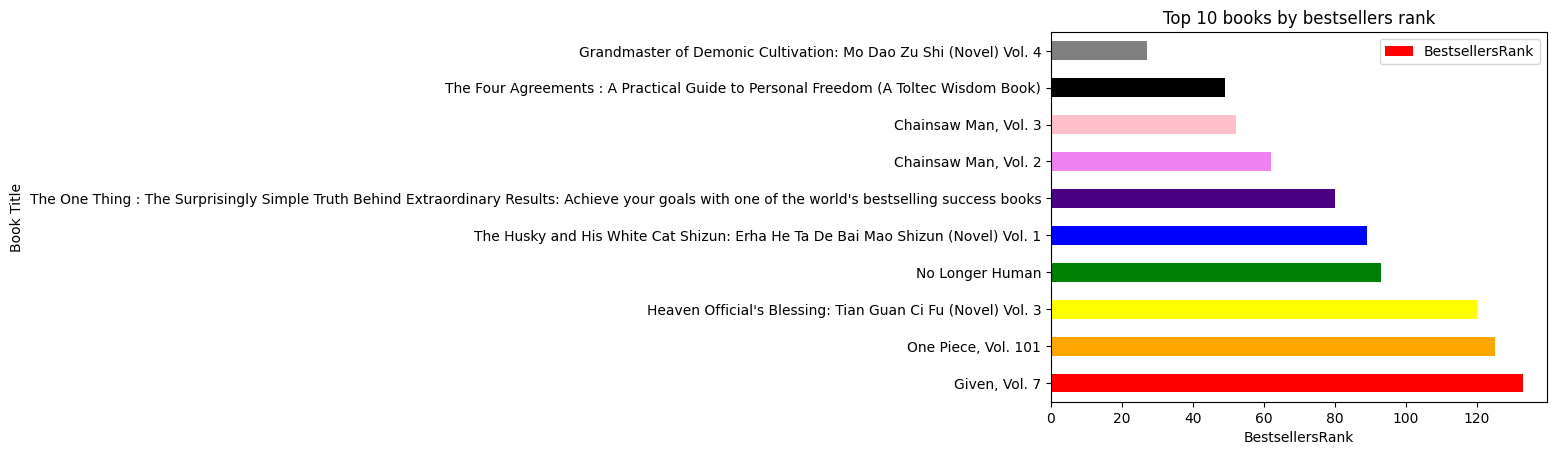

In [163]:
bestsellers_rank_books_df = books_df[books_df["BestsellersRank"] != 0]
bestsellers_rank_books_df = bestsellers_rank_books_df.sort_values(by="BestsellersRank", ascending=False)
top_10_bestsellers_rank_books = bestsellers_rank_books_df.tail(10)

top_10_bestsellers_rank_books.plot(
    x="Title",
    y="BestsellersRank",
    kind="barh",
    xlabel="BestsellersRank",
    ylabel="Book Title",
    title="Top 10 books by bestsellers rank",
    color=["red", "orange", "yellow", "green", "blue", "indigo", "violet", "pink", "black", "gray"],
)

plt.show()

Number of books written each year:

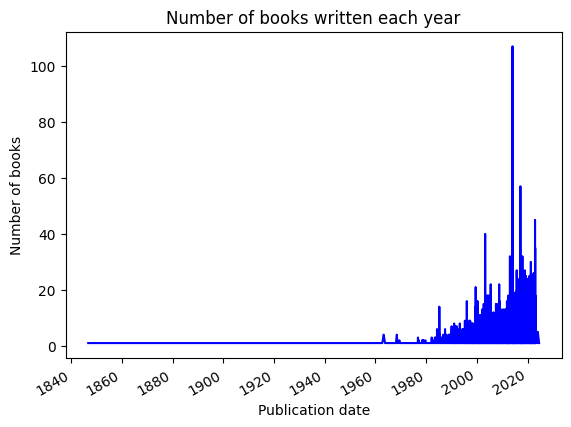

In [164]:
year_group = books_df.groupby("PublicationDate")
year_count = year_group["Title"].count()

year_count.plot(
    kind="line",
    xlabel="Publication date",
    ylabel="Number of books",
    title="Number of books written each year",
    color="blue",
)

plt.show()

Dependency between the number of pages and the price:

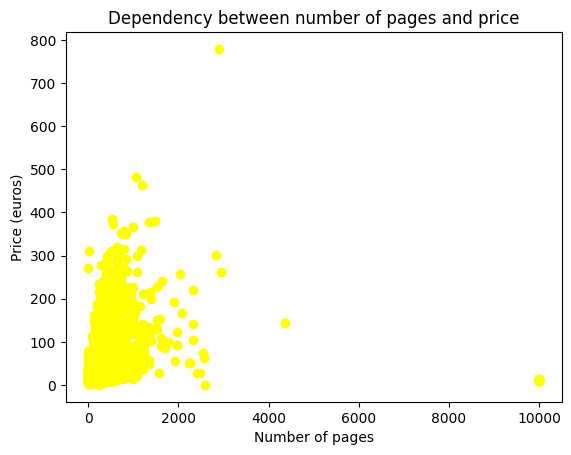

In [165]:
plt.scatter(
    books_df["NumberOfPages"],
    books_df["PriceInEuros"],
    color="yellow",
)
plt.xlabel("Number of pages")
plt.ylabel("Price (euros)")
plt.title("Dependency between number of pages and price")

plt.show()

Dependency between the number of pages and the star rating:

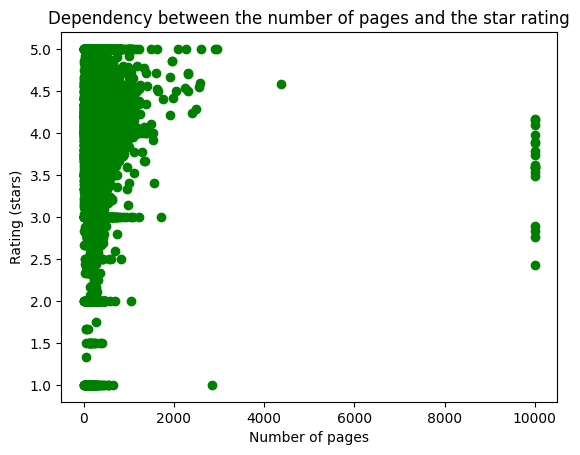

In [166]:
plt.scatter(
    books_df["NumberOfPages"],
    books_df["Rating"],
    color="green",
)
plt.xlabel("Number of pages")
plt.ylabel("Rating (stars)")
plt.title("Dependency between the number of pages and the star rating")

plt.show()

Dependency between the number of pages and the bestsellers rank:

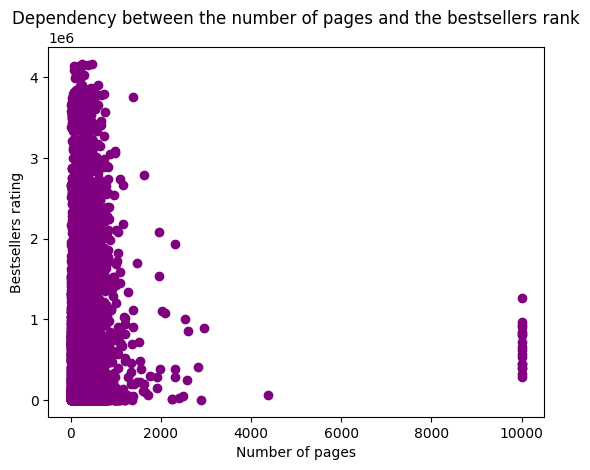

In [167]:
plt.scatter(
    books_df["NumberOfPages"],
    books_df["BestsellersRank"],
    color="purple",
)
plt.xlabel("Number of pages")
plt.ylabel("Bestsellers rating")
plt.title("Dependency between the number of pages and the bestsellers rank")

plt.show()

# Conclusions